In [2]:
# open lrg indices

from astropy.table import Table
t1 = Table.read('../lrg_sample_indices.dat', format='ascii')

In [6]:
t2 = Table.read('../lrg_photo_cat.hdf5', path='data')

In [12]:
t3 = Table.read('../object_sdss_imaging.fits')

In [13]:
t4 = Table.read('../object_sdss_spectro.fits')

In [21]:
t2.colnames

['RA',
 'DEC',
 'RUN',
 'CAMCOL',
 'FIELD',
 'ID',
 'PIXSCALE',
 'PSF_FWHM',
 'PHI_OFFSET',
 'PETRORAD',
 'PETRORADERR',
 'PETROR50',
 'PETROR50ERR',
 'PETROR90',
 'PETROR90ERR',
 'M_E1',
 'M_E2',
 'M_E1E1ERR',
 'M_E1E2ERR',
 'M_E2E2ERR',
 'M_RR_CC',
 'M_RR_CCERR',
 'M_CR4',
 'M_E1_PSF',
 'M_E2_PSF',
 'M_RR_CC_PSF',
 'M_CR4_PSF',
 'ISO_ROWC',
 'ISO_ROWCERR',
 'ISO_ROWCGRAD',
 'ISO_COLC',
 'ISO_COLCERR',
 'ISO_COLCGRAD',
 'ISO_A',
 'ISO_AERR',
 'ISO_AGRAD',
 'ISO_B',
 'ISO_BERR',
 'ISO_BGRAD',
 'ISO_PHIGRAD',
 'R_DEV',
 'R_DEVERR',
 'AB_DEV',
 'AB_DEVERR',
 'R_EXP',
 'R_EXPERR',
 'AB_EXP',
 'AB_EXPERR',
 'PHI_ISO_DEG',
 'PHI_DEV_DEG',
 'PHI_EXP_DEG']

In [100]:
bins = np.linspace(0,2,200)
counts = np.histogram(e, bins=bins)[0]

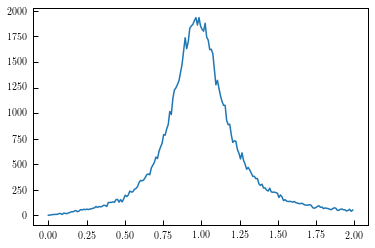

In [101]:
plt.plot(bins[:-1], counts)
#plt.yscale('log')

In [94]:
y = t2['M_E2'][:,1]/np.cos(2.0*np.radians(t2['PHI_ISO_DEG'][:,1]))

In [95]:
e = np.sqrt(1-y)/np.sqrt(1+y)

/Users/duncan/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


In [93]:
t2['PHI_ISO_DEG'][:,1]

-67.99829
27.929195
89.31217
14.884501
-25.285116
-25.098034
54.379356
-13.241968
-5.8281007
13.859051
-49.27983
